# Validação de Modelos

In [1]:
import pandas as pd

uri = "/content/drive/MyDrive/projetos/projetos-classificacao/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [2]:
x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

x = dados[["preco", "idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

SEED = 158020
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


In [4]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y) * 100

print("A acurácia do dummy stratified foi de %.2f%%" % acuracia)

A acurácia do dummy stratified foi de 50.96%


In [5]:
from sklearn.tree import DecisionTreeClassifier

SEED = 158020
np.random.seed(SEED)
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print ("A acurácia foi %.2f%%" % acuracia)

A acurácia foi 71.92%


Não faz sentido validar, julgar se é bom ou ruim, de acordo com um número aleatório, pois nesse caso se mudarmos por exemplo o valor de SEED, o resultado seria diferente, apenas colocando um valor aleatório. Queremos minimizar o efeito dessa aleatoriedade, dessa escolha aleatória do treino, do teste e da DecisionTreeClassifier, na nossa decisão.

No entanto, se rodamos o treino e o teste uma única vez, corremos o risco de os ter separado mal. Precisamos de outra forma de treinar e testar mais de uma vez para que não tenhamos uma estimativa única, uma maneira que permita rodar o treino e o teste diversas vezes e, a partir disso, obter uma estimativa.

Em vez de um ponto, queremos um intervalo. Precisamos encontrar um método, um algorítimo para isto. Adiante, estudaremos como solucionar essa questão!

Aplicando a validação cruzada:

In [6]:
from sklearn.model_selection import cross_validate

SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = 3, return_train_score=False) # cv = em quantos grupos vão ser quebrados os dados
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

# Verificando o resultado da média mais 2x o desvio padrão, e menos 2x o desvio padrão, pois sabemos
# de conceitos estatísticos que 95% da densidade estará na média, mais ou menos dois desvios padrões, para dados que possuem comportamento de uma distribuição normal
print("Accuracy com cross validation, 3 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 3 = [74.99, 76.57]


In [7]:
from sklearn.model_selection import cross_validate

SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = 10, return_train_score=False) # cv = em quantos grupos vão ser quebrados os dados
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

# Verificando o resultado da média mais 2x o desvio padrão, e menos 2x o desvio padrão, pois sabemos
# de conceitos estatísticos que 95% da densidade estará na média, mais ou menos dois desvios padrões, para dados que possuem comportamento de uma distribuição normal
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [74.24, 77.32]


In [8]:
from sklearn.model_selection import cross_validate

SEED = 158020
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = 5, return_train_score=False) # cv = em quantos grupos vão ser quebrados os dados
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

# Verificando o resultado da média mais 2x o desvio padrão, e menos 2x o desvio padrão, pois sabemos
# de conceitos estatísticos que 95% da densidade estará na média, mais ou menos dois desvios padrões, para dados que possuem comportamento de uma distribuição normal
print("Accuracy com cross validation, 5 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 5 = [75.21, 76.35]


Percebam que mudamos o valor de SEED — número aleatório que influencia o algorítmo —, mas Accuracy se mantém. Podemos alterar novamente SEED, para 301, por exemplo, e o intervalo permanecerá o mesmo, de 74.99 a 76.57. Ou seja, nosso algorítimo não está mais tão suscetível a essa aleatoriedade! Contudo, estamos suscetíveis ao número de cv.

Então, qual número devemos usar para o cross validation (cv)? Alguns papers científicos, encontrados na documentação da versão usada no vídeo, apontam que escolher 5 ou 10 para cv já é o suficiente. Sendo assim, vamos manter o valor de cv do nosso código como 5, que gerou o intervalo de 75.21 a 76.35, para a taxa de acerto que acreditamos alcançar com o algoritmo que estamos utilizando, como demonstrado logo acima.

A partir da versão 0.22 do SKLearn, passou-se a adotar 5 como padrão, em vez de 3, de acordo com o seguinte trecho da documentação:


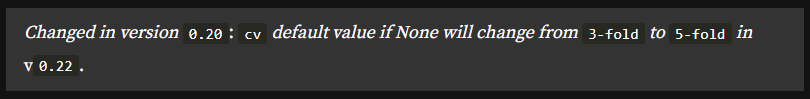

Por essa razão, 5 é o valor que costuma ser utilizado no início de um cross_validate.

## Aleatoriedade nos Cross Validate

O cross_validate() não recebe o parâmetro de aleatoriedade, e esse é o padrão. Da maneira utilizada por nós, ele é determinístico, e nós sabemos em quantos pedaços ele quebrará os dados, porque somos nós quem decidimos essa quantidade. Portanto, a realidade é que a aleatoriedade (random) só é aplicada em DecisionTreeClassifier(). E, por padrão, ele só a usará em um caso específico e raro. Por estas razões, mesmo que mudemos constantemente o valor de SEED, obteremos basicamente sempre os mesmos números.

A ideia era rodar aleatoriamente, de fato. Por mais que recebamos todos os dados em uma sequência, não queremos quebrar eles em 5 pedaços e, a partir disso, fazer o cross_validate. O ideal seria embaralhar estes dados e, então executar a validação cruzada. O algorítimo pode fazer isso de maneira mais inteligente, sem embaralhar e copiar todo o espaço de memória e todos os objetos que estiverem dentro, e assim por diante. Mas o importante é a ideia de embaralhar esses dados de alguma maneira, e o cross_validate não faz isso de verdade.

In [9]:
from sklearn.model_selection import KFold

SEED = 158020
np.random.seed(SEED)

# definindo nosso parâmetro cross validate 
# o cv aceita como parâmetro, tanto números, quanto geradores de validação cruzada. E existem diversos geradores de validação cruzada. O que estamos usando é o KFold, que "corta" nossos dados em K pedaços.
# agora sim aplicando o método do KFold para termos a aleatoriedade, com o parâmetro shuffle, que será aplicado lá na frente nas próximas células
cv = KFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False) # cv = em quantos grupos vão ser quebrados os dados
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()

# Verificando o resultado da média mais 2x o desvio padrão, e menos 2x o desvio padrão, pois sabemos
# de conceitos estatísticos que 95% da densidade estará na média, mais ou menos dois desvios padrões, para dados que possuem comportamento de uma distribuição normal
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [74.37, 77.19]


In [10]:
def imprime_resultados(results):
  media = results['test_score'].mean()
  desvio_padrao = results['test_score'].std()
  print("Accuracy médio: %.2f" % (media*100))
  print("Accuracy inetrvalo: [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))

In [11]:
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy inetrvalo: [74.37, 77.19]


In [12]:
SEED = 301
np.random.seed(SEED)

# agora sim aplicando o parâmetro shuffle para termos a aleatoriedade na quebra dos dados 
cv = KFold(n_splits = 10, shuffle = True)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.76
Accuracy inetrvalo: [73.26, 78.26]


Sempre podemos ter muito azar em uma condição muito específica. Antes de trabalharmos com validação cruzada, estudamos uma questão de sorte e azar em que a validação era simples: treino-teste. Tínhamos o azar de que nossos dados, no momento de realmente utilizá-los, eram separados como, por exemplo, vendido ou não vendido.

Como resultado, no treino estavam quase todos que não foram vendidos e no teste quase todos que foram vendidos. Ou seja, ocorria um desbalanceamento das classes, seja no conjunto inteiro de dados ou na hora de treinar e testar, e seja pela aleatoriedade ou pela natureza dos dados. Então, se tivermos azar, o que pode acontecer?

Quando separávamos o treino e o teste com o train_test_split — que também está no model_selection, em Splitter Functions — tínhamos o Stratify como parâmetro, que definia a proporção. Por exemplo, se temos 70% dos dados na classe 0 (não vendido) e 30% na classe 1 (vendido), ele distribui 70% e 30% tanto para treino, quanto para teste. No entanto, esse parâmetro não existe no cross_validate do KFold, que possui apenas os parâmetros n_splits, shuffle e random_state. Sendo assim, não está estratificando.

Então, vamos simular uma situação de azar para podermos aprimorar nosso processo. Sendo assim, identificaremos esse código com # Simular situação horrível de azar. Abaixo, adicionaremos o texto Pode ser uma situação de "azar" ou uma proporção de exemplos desbalanceado entre as classes. Pegaremos os dados (dados.sort_values()) do nosso data frame e ordenaremos pela classe vendido, crescente (ascending=True), ou seja, primeiro 0 e depois 1. Assim, o "não vendido" virá antes do "vendido". Essa é a separação que estabelecemos.

In [13]:
# Simular situação horrível de azar
# pode ser azar como pode ser uma proporção de exemplos desbalanceado entre as classes

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


Sem o Shuffle:

In [14]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 57.84
Accuracy inetrvalo: [34.29, 81.39]


Com o Shuffle:

In [15]:
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10, shuffle = True)
modelo = DecisionTreeClassifier(max_depth = 2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy inetrvalo: [72.30, 79.26]


O shuffle nos é suficientemente bom nesta situação em que temos balanço para recuperar, mas e se quiséssemos fazer a estratificação?

Além do KFold, temos outros geradores de grupo de separação, dentre eles o StratifiedKFold, que recebe um número de n_splits, shuffle e depois separa, mantendo a proporção entre as classes.

Lembrando que o Stratified é um parâmetro em que queremos definir que a função utilize a proporção do target tanto para o treino quanto para o teste, ou seja, se temos um target que apresenta valor 1 em média 30% dos dados, queremos que essa mesma proporção apareça tanto no conjunto de treino quanto de teste. O parâmetro Stratified se encarrega disso

In [16]:
from sklearn.model_selection import StratifiedKFold

SEED = 301
np.random.seed(SEED)

cv = StratifiedKFold(n_splits = 10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy inetrvalo: [73.55, 78.01]


Sempre muito importante utilizar esse recurso quando temos o desbalanciamento de dados entre uma ou mais classes no nosso Target

--------------------------------------------------

## Gerando dados aleatórios de modelo de carro para simulação de agrupamento ao usar nosso estimador

O modelo inicial utilizava o preço, a kilometragem, e a idade do carro para determinar se o carro foi vendido ou não. Portanto são 3 informações utilizadas para a explicação de uma variável resposta. Mas será que essas são as únicas características necessárias para determinar se um carro é vendido ou não?

Conforme você aumenta a quantidade de variáveis explicativas a um modelo, maior o poder de explicação de uma variável resposta. Claro que devemos avaliar se as variáveis que estão sendo adicionadas fazem sentido e são significantes para a explicação de uma variável. O tipo de modelo de um carro parece ser algo que faça sentido ser adicionado para explicar se um carro foi vendido ou não. Dessa forma você terá mais poder de explicação da variável resposta. POR ESSE MOTIVO CRIADO A COLUNA MODELO !!!

O instrutor utilizou uma abordagem para definir o modelo de carro com base na idade do veículo, fazendo uma certa variação aleatória. Mas você pode utilizar o resultado de um algoritmo de clusterização nos seus dados para encontrar os modelos de cada um desses veículos, e dessa forma poderia obter resultados ainda melhores.

Ao aumentar muito a quantidade de variáveis, o poder de explicação irá aumentar mas cada vez mais com uma velocidade mais lenta, visto que as variáveis explicativas podem estar explicando umas as outras, ainda que de forma indireta. Portanto, há um certo limite no qual devemos ponderar ao aumentar a quantidade de variáveis, que não trarão grandes melhorias de resultados e que podem ainda trazer problemas como o de multicolinearidade e de utilização computacional muito grande.

In [17]:
np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


O GroupKFold possui a função de dividir nosso conjunto de treino e teste em k-dobras (k-fold) de forma que as amostras com mesmo grupo não sejam representadas nos conjuntos de teste e teste simultaneamente. Fazendo isso nós temos uma melhor aproximação de como o nosso modelo funcionará no mundo real, pois ele está sempre sendo treinado com dados de alguns grupos, e quando vamos testar colocamos um grupo que o nosso modelo nunca viu, e essas características podem ser algo totalmente diferentes das demais, pois amostras de grupos diferentes tendem a ter características diferentes também. Então o GroupKFold nos dá a resposta se nosso modelo é generalista ou não.

O motivo dele está sendo passado somente no cross_validate é porque nesse método você pode fazer essa divisão entre os grupos (feita no nosso exemplo) internamente através do parâmetro groups, esse método é utilizado quando o parâmetro cv (que é a estratégia de validação cruzada a ser utilizada) possui também um parâmetro groups, que é o caso GroupKFold em que os métodos responsáveis por essa divisão possui o parâmetro groups.

**Testando validação cruzada com GroupKFold**

In [18]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio: 75.78
Accuracy inetrvalo: [73.67, 77.90]


Lembrando que poderiamos ter passado outro parâmetro para separação desses dados, como por exemplo a coluna do preço ou da idade do modelo, por exemplo. Não necessariamente precisaria ser criada essa coluna aleatória chamada modelo. Portanto não há problema para utilizar o agrupamento do GroupKfold com uma coluna que contém os labels dos meus dados clusterizados

## Cross Validation com StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(treino_x)
treino_x_escalado = scaler.transform(treino_x)
teste_x_escalado = scaler.transform(teste_x)

modelo = SVC()
modelo.fit(treino_x_escalado, treino_y)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi de %.2f %%" % acuracia)

A acurácia foi de 74.40 %


In [20]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = SVC()
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo,return_train_score=False)
imprime_resultados(results)

Accuracy médio: 77.27
Accuracy inetrvalo: [74.35, 80.20]


In [21]:
scaler = StandardScaler()
scaler.fit(x_azar)
x_azar_escalado = scaler.transform(x_azar)

In [22]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = SVC()
results = cross_validate(modelo, x_azar_escalado, y_azar, cv = cv, groups = dados.modelo,return_train_score=False)
imprime_resultados(results)

Accuracy médio: 76.70
Accuracy inetrvalo: [74.30, 79.10]


Criando o Scaler, criando o SVC, e utilizando eles no Pipeline. Defino meu KFold

In [27]:
from sklearn.pipeline import Pipeline

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()
pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo,return_train_score=False)
imprime_resultados(results)

Accuracy médio: 76.68
Accuracy inetrvalo: [74.28, 79.08]


Reparem que o valor anterior e este não são tão distantes, mas é preciso entender que a forma feita anteriormente estava errada, porque rodávamos o scaler somente uma vez, para depois rodar os KFolds. Não é questão de estar melhor ou pior, pois estamos falando de um processo, que deve ser rodado para cada uma das fases de treino. Portanto, se tivermos 10 fases de treino, teremos que rodar o scaler para cada uma do conjunto de treino. E é isso que o Pipeline faz para nós, de forma muito mais prática. Basta inserir todas as fases nele e rodar. Claro, pode demorar um pouco mais, mas é a opção que faz mais sentido.


**Para rodar algorítimos com cross_validate, que exigem pré processamento será necessário incluí-lo em um Pipeline.**

---------------------------------------------------


'results' indica o que esperar. Para obter o modelo final basta treiná-lo em todos os dados que você usou para o crossvalidation:

In [30]:
modelo.fit(x_azar, y_azar)
previsoes = modelo.predict(x_azar)
previsoes

array([0, 0, 0, ..., 0, 0, 1])